In [27]:
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [32]:
result = {} 

for datanodes in [1, 3]:
    result[datanodes] = {} 
    for optimized in ["True", "False"]: 
        result[datanodes][optimized] = {"Time": [], "RAM": []} 
        with open(f"DataNodes_{datanodes}_opt_{optimized}.txt", "r") as f:
            for string in f.readlines(): 
                time_res = re.search(r'Time: (\d+\.\d+)', string).group(1)
                RAM_res = re.search(r'RAM: (\d+\.\d+)', string).group(1)
                result[datanodes][optimized]["Time"].append(time_res) 
                result[datanodes][optimized]["RAM"].append(RAM_res) 

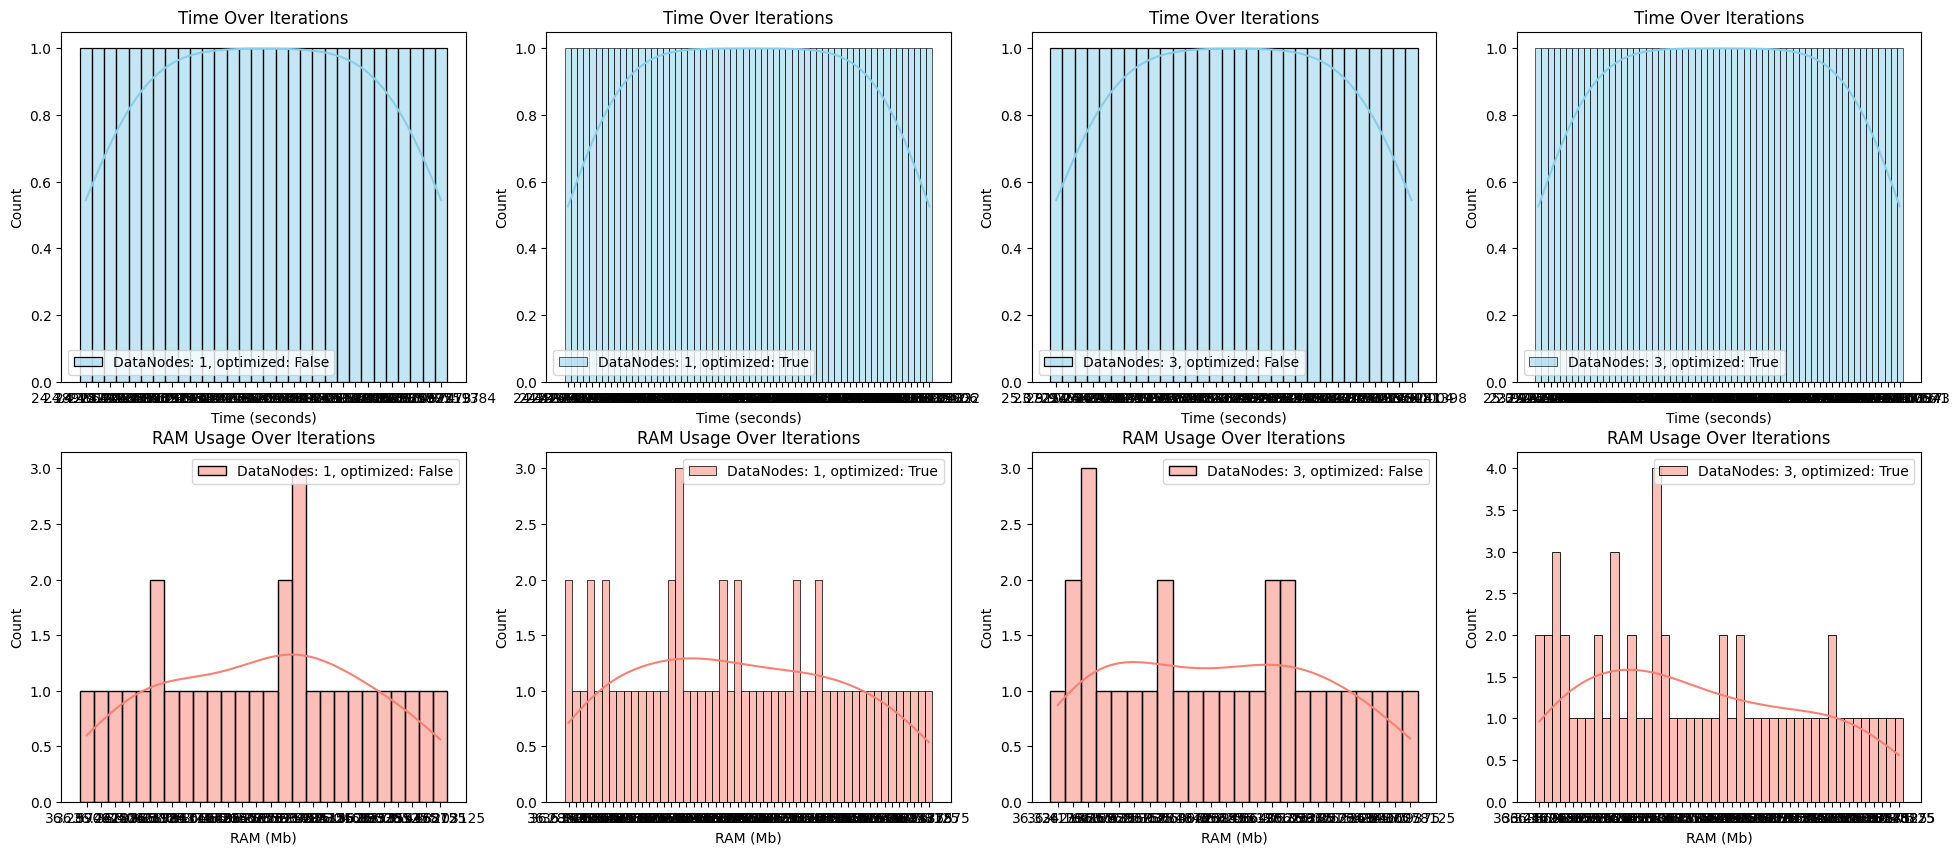

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24,10))

for i, (datanodes, optimized) in enumerate([(1, "False"), (1, "True"), (3, "False"), (3, "True")]):
    sns.histplot(result[datanodes][optimized]["Time"], kde=True, color='skyblue', label=f"DataNodes: {datanodes}, optimized: {optimized}", ax=axes[0][i])
    axes[0][i].set_xlabel("Time (seconds)")
    axes[0][i].set_title('Time Over Iterations')
    axes[0][i].legend() 

    sns.histplot(result[datanodes][optimized]["RAM"], kde=True, color='salmon', label=f"DataNodes: {datanodes}, optimized: {optimized}", ax=axes[1][i])
    axes[1][i].set_xlabel("RAM (Mb)") 
    axes[1][i].set_title('RAM Usage Over Iterations')
    axes[1][i].legend() 

plt.show() 